In [12]:
%matplotlib inline

import copy
import matplotlib.pyplot as pyplot

import numpy as np

import geopandas as gpd
import shapely.geometry as geom
import shapely.affinity as affine

import sys
sys.path.insert(0, "../")
from weavingspace import Topology
from weavingspace import TileShape
from weavingspace import TileUnit
from weavingspace import WeaveUnit
from weavingspace import tiling_utils

In [13]:
square = tiling_utils.get_regular_polygon(200, 4)
L_shape = square.union(
  affine.translate(square, 200, 0)).union(
  affine.translate(square, 0, 200))
L_shape = tiling_utils.get_clean_polygon(L_shape)

tile = TileUnit()
tile.base_shape = TileShape.HEXAGON
tile.tiles = gpd.GeoDataFrame(
  {"tile_id": list("abcd")},
  geometry = gpd.GeoSeries([affine.translate(L_shape, -100, 200), 
                            affine.translate(L_shape, 100, -200),
                            affine.translate(L_shape, -100, -400), 
                            affine.translate(L_shape, -300, 0)]))
tile.setup_regularised_prototile_from_tiles()
tile.prototile = gpd.GeoDataFrame(
  geometry = gpd.GeoSeries(
    geom.Polygon([(100, -450), (-300, -350), (-300, 350),
                  (-100, 450), (300, 350), (300, -350)])))
tile.setup_vectors()

n_sides=6 n_slices=6 offset=1


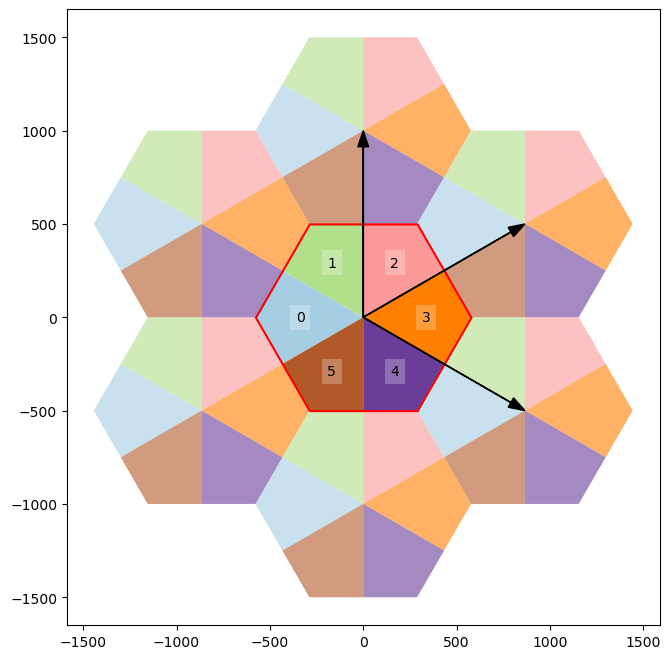

In [14]:
# tile = TileUnit(tiling_type = "archimedean", code = "3.3.4.3.4")
# tile = TileUnit(tiling_type = "hex-dissection", n = 7, offset = 1)
tile = TileUnit(tiling_type = "hex-slice", n = 6, offset = 1)
# tile = TileUnit(tiling_type = "archimedean", code = "3.4.6.4")
# tile = TileUnit(tiling_type = "archimedean", code = "3.12.12")
# tile = TileUnit(tiling_type = "archimedean", code = "4.8.8")
# tile = TileUnit(tiling_type = "cairo", n = 3)
# tile = TileUnit(tiling_type = "hex-colouring", n = 3).transform_skew(20).transform_scale(1.2)
# tile = WeaveUnit(weave_type = "plain", n = 2, strands = "a|d")
# tile = WeaveUnit(weave_type = "basket", n = 3, strands = "abc|def", spacing = 200)
# tile = WeaveUnit(weave_type = "twill", n = 2, strands = "ab|de")
ax = tile.plot(r = 1, show_reg_prototile = True, show_prototile = True, cmap = "Paired", show_ids = "id", r_alpha = 0.6, show_vectors = True)

In [15]:
topo = Topology(tile)

## Plot of topology
Various options - but showing below the vertex and edge labelling resulting from determination of transitivity classes, and with tiles coloured by transitivity class.

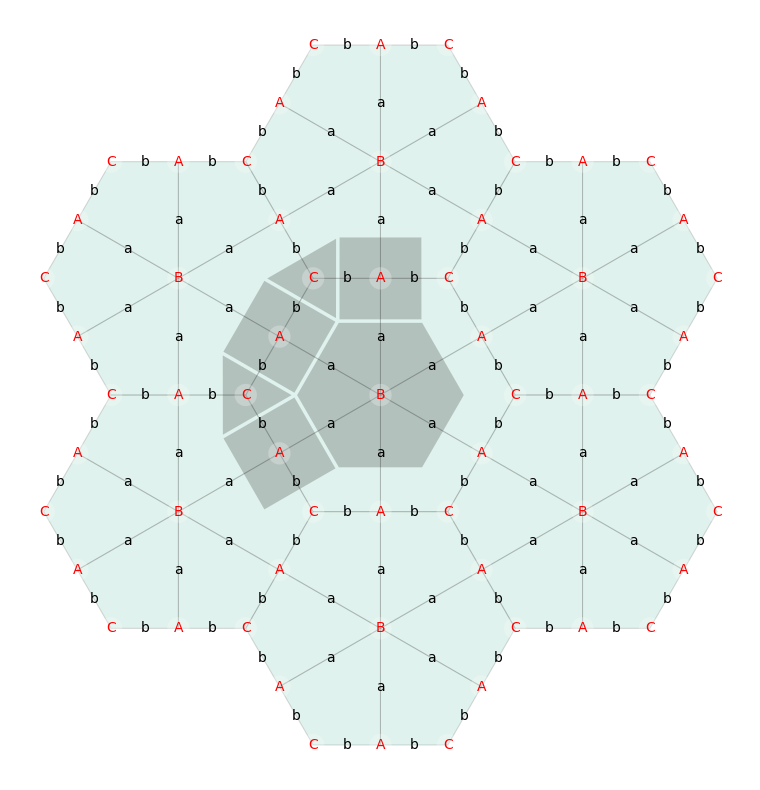

In [16]:
ax = topo.plot(
  show_original_tiles = True,
  show_tile_vertex_labels = False,
  show_tile_edge_labels = False,
  show_tile_centres = False,
  show_vertex_labels = True,
  show_vertex_ids = False,
  show_edge_labels = True,
  show_edges = False,
  offset_edges = False,
  show_dual_tiles = True
)
# gpd.GeoSeries(symmetry_centres).plot(ax = ax)

## Tiling symmetries
As discovered in topology construction.

In [17]:
topo.tile_matching_transforms

{0: reflection 60.0° (np.float64(-0.5), np.float64(0.866), np.float64(0.866), np.float64(0.5), np.float64(0.0), np.float64(0.0)),
 1: reflection 30.0° (np.float64(0.5), np.float64(0.866), np.float64(0.866), np.float64(-0.5), np.float64(0.0), np.float64(0.0)),
 2: reflection 0.0° (np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(-1.0), np.float64(0.0), np.float64(0.0)),
 3: reflection -30.0° (np.float64(0.5), np.float64(-0.866), np.float64(-0.866), np.float64(-0.5), np.float64(0.0), np.float64(0.0)),
 4: reflection -60.0° (np.float64(-0.5), np.float64(-0.866), np.float64(-0.866), np.float64(0.5), np.float64(0.0), np.float64(0.0)),
 5: reflection -90.0° (np.float64(-1.0), np.float64(-0.0), np.float64(-0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0)),
 13: rotation 60.0° POINT (-0.0 -0.0) (np.float64(0.5), np.float64(-0.866), np.float64(0.866), np.float64(0.5), np.int64(0), np.int64(0)),
 15: rotation 120.0° POINT (0.0 0.0) (np.float64(-0.5), np.float64(-0.866), np.fl

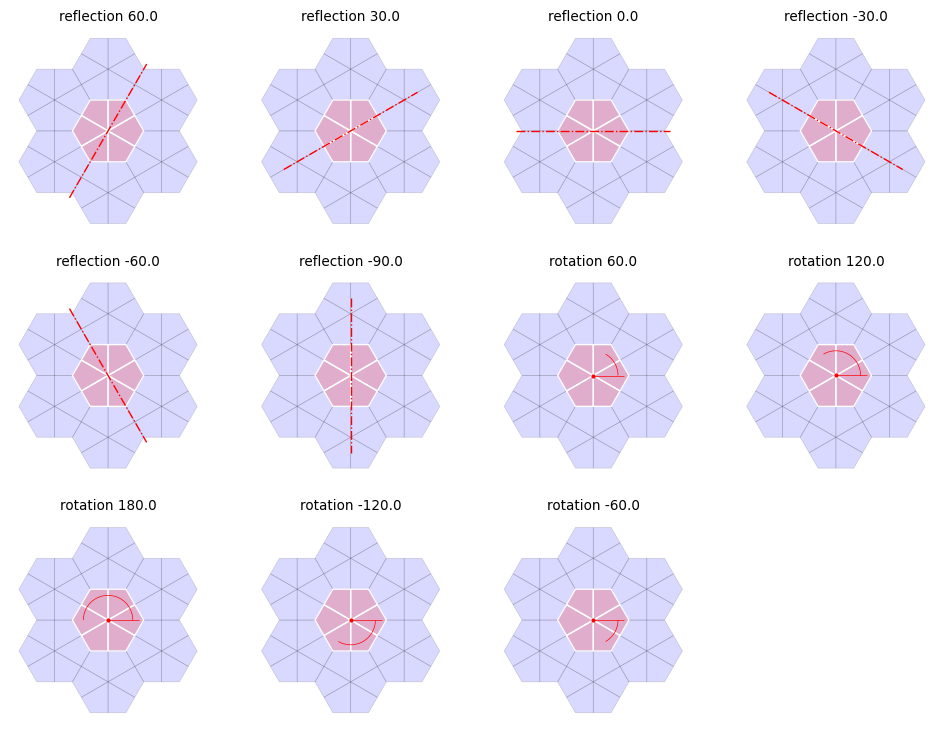

In [18]:
topo.plot_tiling_symmetries(mirror_length = 2500, radius = 400, c = geom.Point(0, 0), )

## Modifying a tiling

CAUTION: new Topology will probably not be correctly labelled. To build a 
correct Topology, extract the tileable attribute and rebuild Topology from that.

CAUTION: new Topology will probably not be correctly labelled. To build a 
correct Topology, extract the tileable attribute and rebuild Topology from that.

CAUTION: new Topology will probably not be correctly labelled. To build a 
correct Topology, extract the tileable attribute and rebuild Topology from that.



<Axes: >

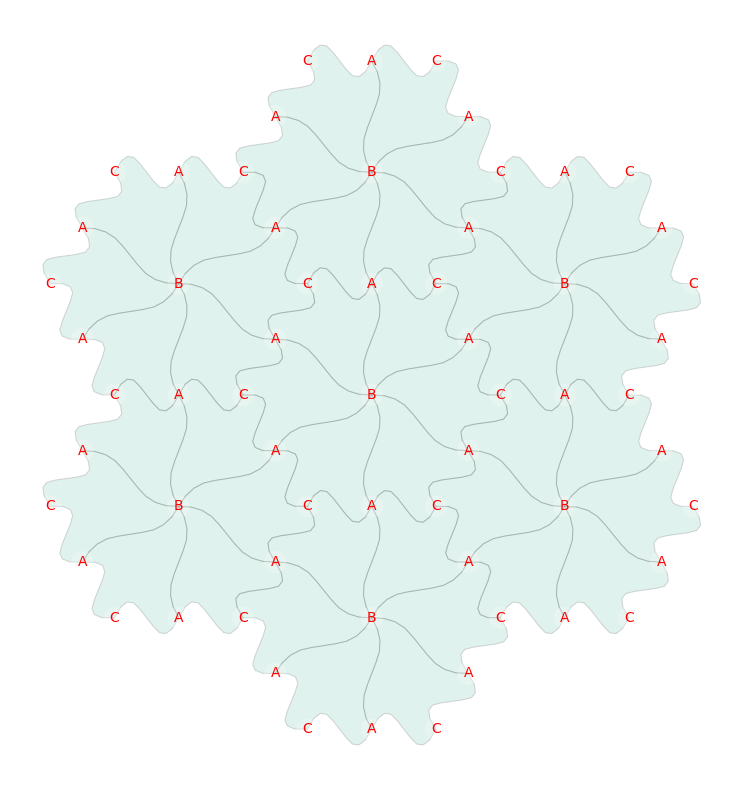

In [19]:
topo2 = topo \
  .transform_geometry(True, False, "a", "zigzag_edge",
                   n=2, start="B", h=.15, smoothness=3) \
  .transform_geometry(False, True, "b", "zigzag_edge",
                   n=2, start="A", h=.5, smoothness=3) \
  .transform_geometry(False, True, "c", "zigzag_edge",
                   n=4, start="B", h=.25, smoothness=3) \

# topo2 = topo \
#   .transform_geometry(True, True, "b", "scale_edge", sf = 3.5)

topo2.plot()

Note that some tiles around the outside might not get 'deformed' correctly because they are unconstrained by neighbours (I think...), but the central tile unit shoul be fine. To see the potential new tiling we do this:

(np.float64(-1623.5304041314287),
 np.float64(1623.5304041314287),
 np.float64(-1728.02476506),
 np.float64(1728.02476506))

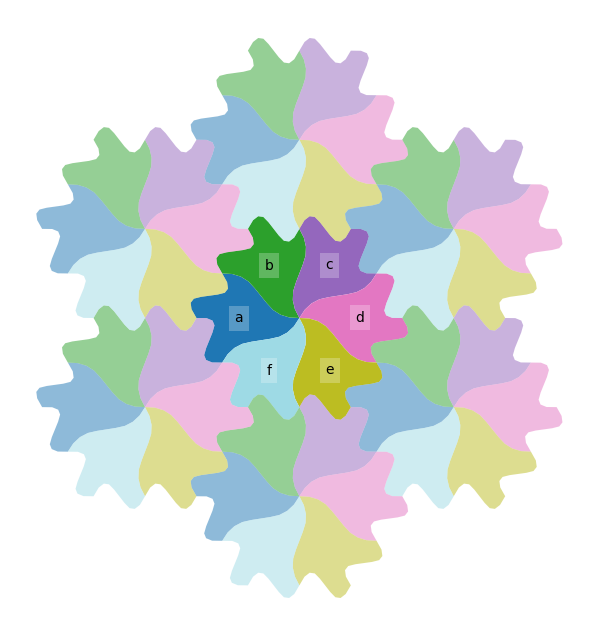

In [20]:
tile_unit = topo2.tileable
tile_unit.plot(r = 1, show_prototile = False, show_reg_prototile = False, 
               r_alpha = 0.5, cmap = "tab20")
pyplot.axis("off")

<Axes: >

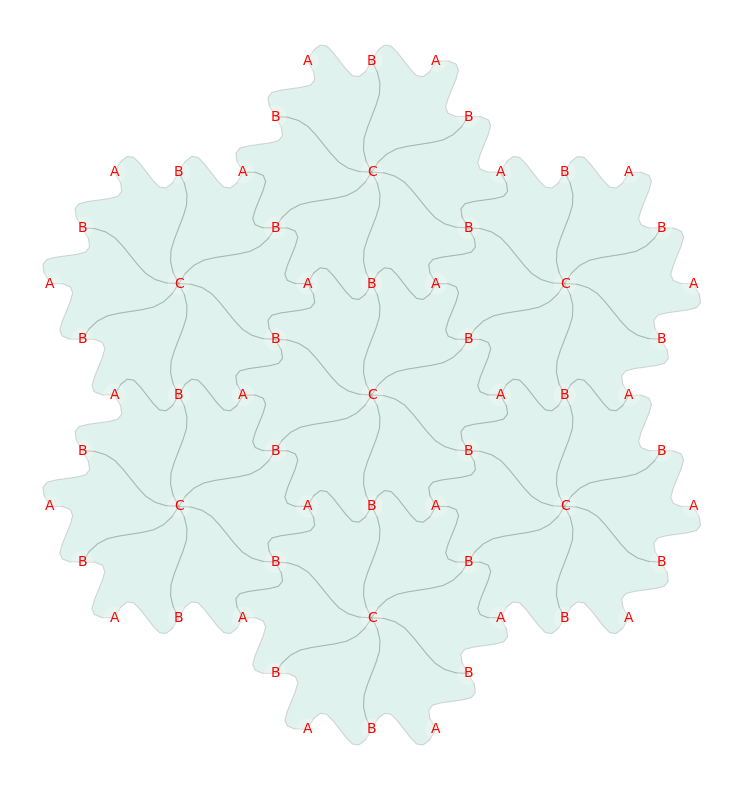

In [21]:
Topology(topo2.tileable).plot()

## Dual tiling from the topology

(np.float64(-2641.0576004734376),
 np.float64(2323.4320863796875),
 np.float64(-2759.6465569953125),
 np.float64(2941.8355094015624))

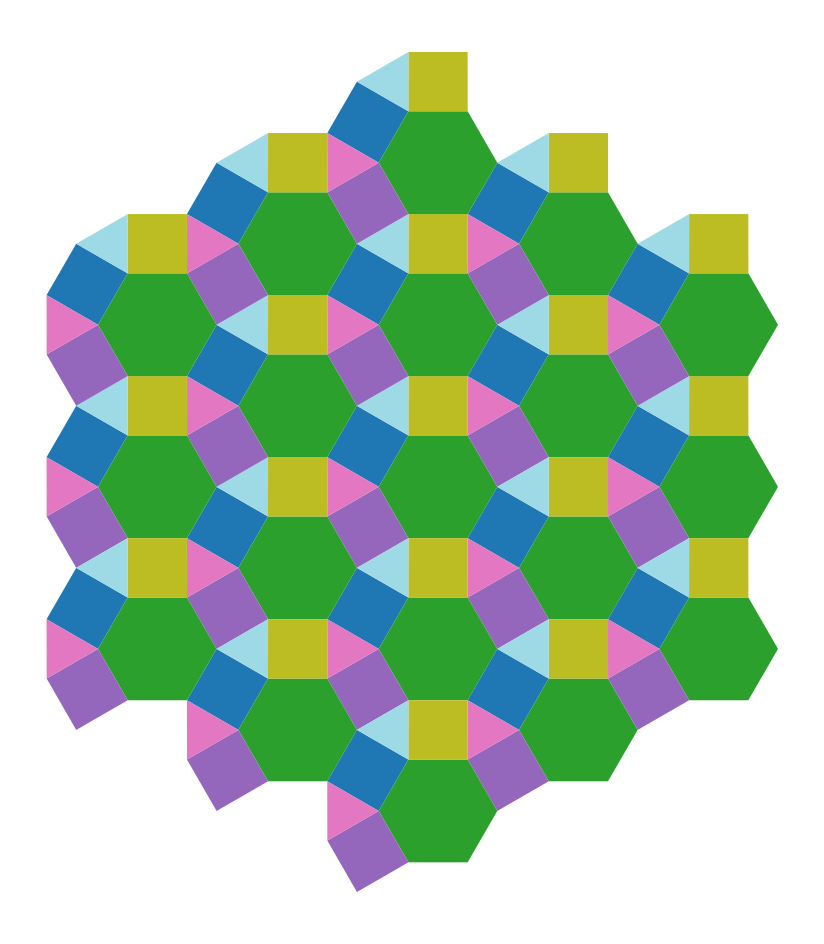

In [22]:
tile2 = copy.deepcopy(topo.tileable)
dual_tiles = list(topo.dual_tiles.values())
tile2.tiles = gpd.GeoDataFrame(
  data = {"tile_id": list("abcdefghijklmnopqrstuvwxyz")[:len(dual_tiles)]},
  geometry = gpd.GeoSeries(dual_tiles))
tile2.setup_regularised_prototile_from_tiles()
ax = tile2.plot(r = 2, show_reg_prototile = False, show_prototile = False,
           cmap = "tab20", r_alpha = 1, show_ids = False, figsize = (12, 12))
pyplot.axis("off")